In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('dataset.xlsx')
data.head()

,Timestamp,Email Address,Age,Gender,What is your current level of education?,What is your field of study?,What is your CGPA (approx)?,What is your living arrangement while studying?,How often do your parents get involved in discussing academic progress?,How happy are you with your parents' involvement in your academics?,...,How frequently do you seek help from teachers or tutors when needed?,Have you ever received academic probation or warning?,"Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?",Did you chose your field of study by yourself or under parents’ pressure?,Which of the following forms of parental support do you receive? (Select all that apply),"How frequently do your parents attend university-related events (e.g., orientations, parent-teacher meetings, graduations)?",How has parental involvement influenced your motivation to pursue higher education?,Do you feel that parental involvement affects your stress levels during your studies?,How would you rate the impact of parental financial support on your academic success?,How does your parents’ involvement in your education affect your social life and extracurricular activities?
0,2024-09-02 18:36:26.156,ramborana3@gmail.com,23,Male,Undergraduate,Computer Science,9-10,Living with parents,Monthly,Very Happy,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
1,2024-09-02 18:39:52.118,dhruvpgandhi26@gmail.com,21,Male,Post Graduate,Computer Science,8-9,Living in university dorms,Daily,Happy,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Often,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
2,2024-09-02 18:39:54.897,jatinaggarwal158@gmail.com,22,Male,Post Graduate,Computer Science,9-10,Living in university dorms,Daily,Very Happy,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
3,2024-09-02 18:41:54.117,adsjak21@gmail.com,24,Male,Post Graduate,Computer Science,8-9,Living in university dorms,Daily,Very Happy,...,Rarely,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
4,2024-09-02 18:43:29.203,pant.4@iitj.ac.in,22,Male,Undergraduate,Computer Science,9-10,Living in university dorms,Rarely,Happy,...,Often,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Sometimes,Increased motivation,"Yes, it increases my stress",Significant,No impact


In [ ]:
data = data.drop(['Timestamp'], axis=1)
data.columns

Index(['Email Address', 'Age', 'Gender',
       'What is your current level of education?',
       'What is your field of study?', 'What is your CGPA (approx)?',
       'What is your living arrangement while studying?',
       'How often do your parents get involved in discussing academic progress?',
       'How happy are you with your parents' involvement in your academics?',
       'Do your parents/guardians set academic goals or expectations for you?',
       'How would you rate your academic performance?',
       'How frequently do you attend your classes?',
       'How frequently do you complete your assignments on time?',
       'How frequently do you seek help from teachers or tutors when needed?',
       'Have you ever received academic probation or warning? ',
       'Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?',
       'Did you chose your field of study by yourself or under parents’ pressure?',
       'Which o

#Data Visualization

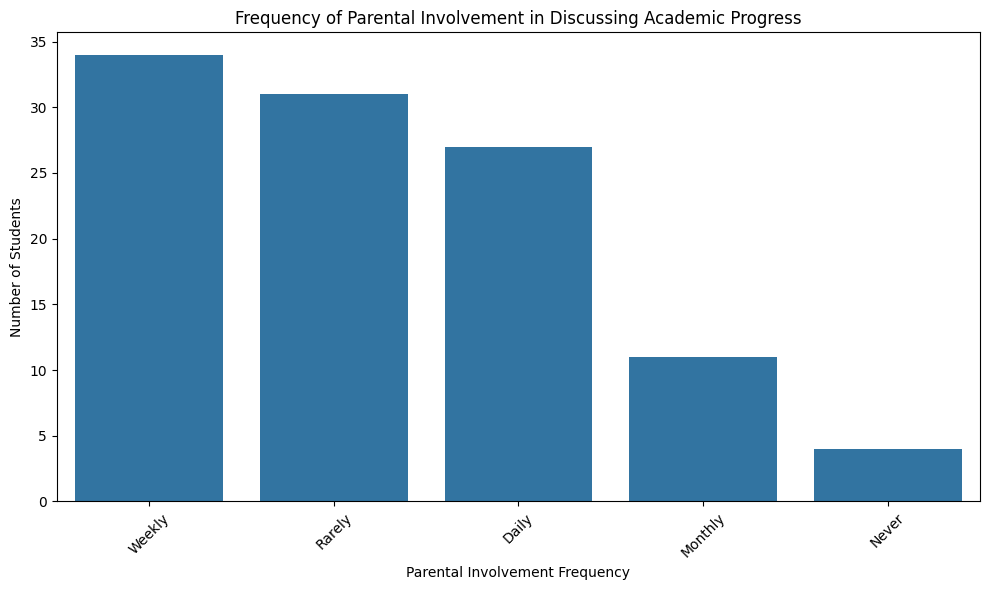

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
parental_involvement_counts = data['How often do your parents get involved in discussing academic progress?'].value_counts()

sns.barplot(x=parental_involvement_counts.index, y=parental_involvement_counts.values)
plt.title('Frequency of Parental Involvement in Discussing Academic Progress')
plt.xlabel('Parental Involvement Frequency')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
df_copy = data.copy()
df_copy['What is your CGPA (approx)?'] = df_copy['What is your CGPA (approx)?'].replace({'Below': 5})
df_copy['What is your CGPA (approx)?'].unique()

array(['9-10', '8-9', '7-8', '6-7', 5], dtype=object)

In [ ]:
df_copy['What is your CGPA (approx)?'] = df_copy['What is your CGPA (approx)?'].replace({'9-10':9.5, '8-9': 8.5, '7-8': 7.5, '6-7': 6.5})
df_copy['What is your CGPA (approx)?'].value_counts()

<ipython-input-7-9122e5c48d63>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['What is your CGPA (approx)?'] = df_copy['What is your CGPA (approx)?'].replace({'9-10':9.5, '8-9': 8.5, '7-8': 7.5, '6-7': 6.5})


,count
What is your CGPA (approx)?,
8.5,57
7.5,31
9.5,9
6.5,9
5.0,1


<ipython-input-8-251db560b2c0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.rename(columns={


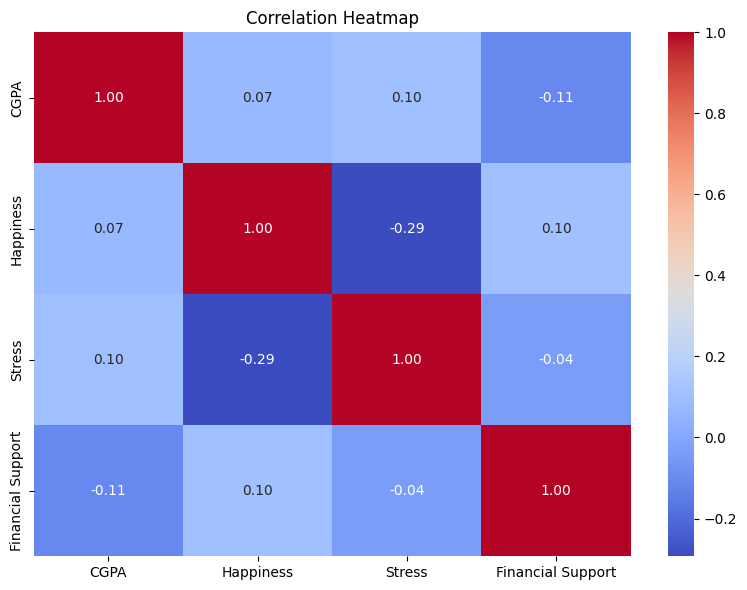

In [ ]:
happiness_mapping = {
    'Very Happy': 5,
    'Happy': 4,
    'Neutral': 3,
    'Unhappy': 2,
    'Very Unhappy': 1
}

stress_mapping = {
    'Yes, it reduces my stress': -1,
    'Yes, it increases my stress': 1,
    'No, it has no effect': 0
}

support_mapping = {
    'Very significant': 5,
    'Significant': 4,
    'Neutral': 3,
    'Not very significant': 2,
    'Not significant at all': 1
}


df_copy['How happy are you with your parents\' involvement in your academics?'] = df_copy['How happy are you with your parents\' involvement in your academics?'].map(happiness_mapping)
df_copy['Do you feel that parental involvement affects your stress levels during your studies?'] = df_copy['Do you feel that parental involvement affects your stress levels during your studies?'].map(stress_mapping)
df_copy['How would you rate the impact of parental financial support on your academic success?'] = df_copy['How would you rate the impact of parental financial support on your academic success?'].map(support_mapping)


df_copy = df_copy.dropna(subset=[
    'How happy are you with your parents\' involvement in your academics?',
    'Do you feel that parental involvement affects your stress levels during your studies?',
    'How would you rate the impact of parental financial support on your academic success?'
])


df_copy.rename(columns={
    'What is your CGPA (approx)?': 'CGPA',
    'How happy are you with your parents\' involvement in your academics?': 'Happiness',
    'Do you feel that parental involvement affects your stress levels during your studies?': 'Stress',
    'How would you rate the impact of parental financial support on your academic success?': 'Financial Support'
}, inplace=True)



correlation_columns = [
    'CGPA',
    'Happiness',
    'Stress',
    'Financial Support'
]


correlation_matrix = df_copy[correlation_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()


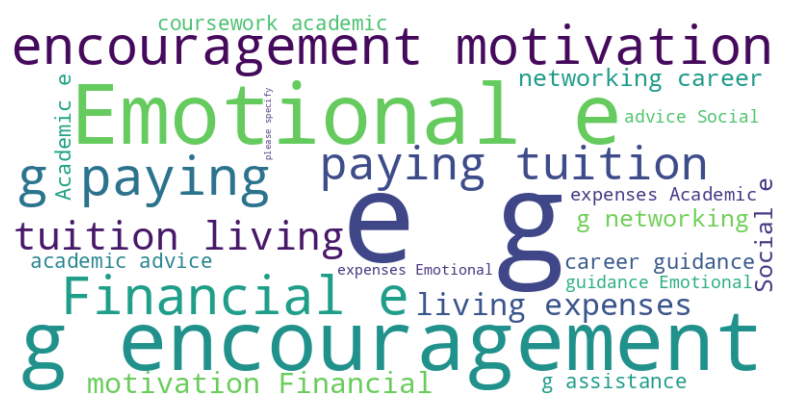

In [ ]:
from wordcloud import WordCloud
import re

supports = ' '.join(data['Which of the following forms of parental support do you receive? (Select all that apply)'])
supports = supports.replace('support', '')

supports_cloud = WordCloud(width=800, height=400, background_color='white').generate(supports)


plt.figure(figsize=(10,5))
plt.imshow(supports_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
supports

'Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses), Academic  (e.g., assistance with coursework, academic advice) Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses) Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses), Academic  (e.g., assistance with coursework, academic advice), Social  (e.g., networking, career guidance) Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses) Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses), Academic  (e.g., assistance with coursework, academic advice), Social  (e.g., networking, career guidance) Emotional  (e.g., encouragement, motivation), Financial  (e.g., paying tuition, living expenses), Academic  (e.g., assistance with coursework, academic advice), Social  (e.g., networking, career guidance) Emotional  (e.g., encouragemen

In [ ]:
import plotly.express as px

dimensions = [
    'Do your parents/guardians set academic goals or expectations for you?',
    'Do you feel that parental involvement affects your stress levels during your studies?',
    'How has parental involvement influenced your motivation to pursue higher education?',
    'How would you rate your academic performance?'
]

short_labels = {
    'Do your parents/guardians set academic goals or expectations for you?': 'Academic Goals',
    'Do you feel that parental involvement affects your stress levels during your studies?': 'Stress Impact',
    'How has parental involvement influenced your motivation to pursue higher education?': 'Motivation',
    'How would you rate your academic performance?': 'Performance'
}

fig = px.parallel_categories(data, dimensions=dimensions, labels=short_labels, color_continuous_scale=px.colors.sequential.Inferno)

fig.show()


In [ ]:
data['Did you chose your field of study by yourself or under parents’ pressure?'].value_counts()

,count
Did you chose your field of study by yourself or under parents’ pressure?,
Yes,57
No.,50


In [ ]:
fig = px.bar(data,
             x='Did you chose your field of study by yourself or under parents’ pressure?',
             color='How would you rate your academic performance?',
             barmode='stack',
             labels={
                 'Did you chose your field of study by yourself or under parents’ pressure?': 'Study Choice',
                 'How would you rate your academic performance?': 'Academic Performance'
             },
             title='Academic Performance vs Study Choice (Self or Parental Pressure)')

# Display the plot
fig.show()

In [ ]:
fig = px.bar(data,
             x='Did you chose your field of study by yourself or under parents’ pressure?',
             color='How would you rate your academic performance?',
             barmode='group',
             labels={
                 'Did you chose your field of study by yourself or under parents’ pressure?': 'Study Choice',
                 'How would you rate your academic performance?': 'Academic Performance'
             },
             title='Academic Performance vs Study Choice (Self or Parental Pressure)')

# Display the plot
fig.show()

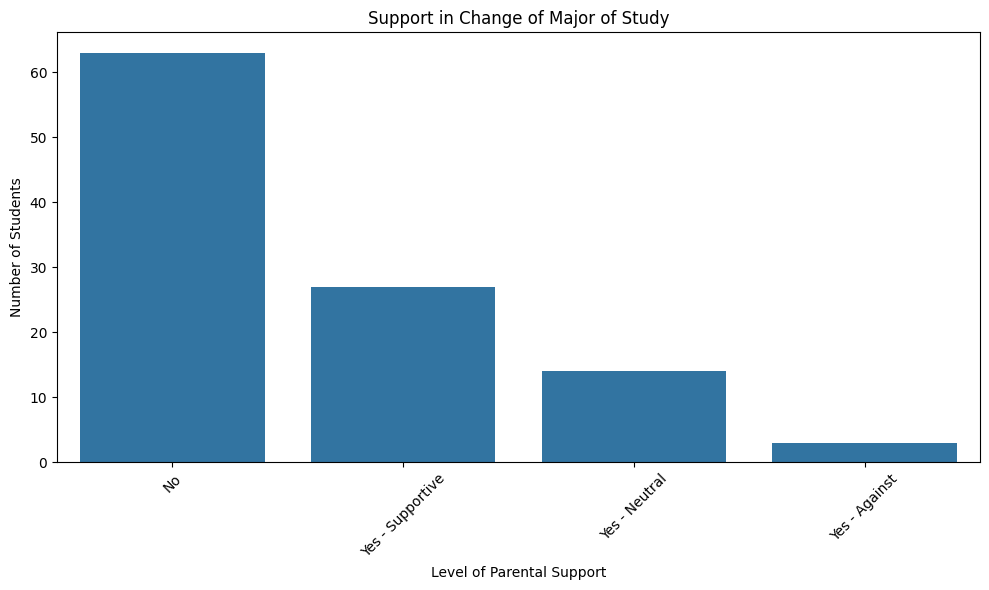

In [ ]:
# Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?
plt.figure(figsize=(10, 6))
parental_involvement_counts = data['Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?'].value_counts()

sns.barplot(x=parental_involvement_counts.index, y=parental_involvement_counts.values)
plt.title('Support in Change of Major of Study')
plt.xlabel('Level of Parental Support')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
fig = px.bar(data,
             x='How often do your parents get involved in discussing academic progress?',
             color='How would you rate your academic performance?',
             barmode='group',
             labels={
                 'How often do your parents get involved in discussing academic progress?': 'Parental Involvement Frequency',
                 'How would you rate your academic performance?': 'Academic Performance'
             },
             title='Parental Involvement vs Academic Performance')

# Display the plot
fig.show()

#Data Cleaning

In [ ]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 2})
data.head()

<ipython-input-16-4d6096f735b7>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Email Address,Age,Gender,What is your current level of education?,What is your field of study?,What is your CGPA (approx)?,What is your living arrangement while studying?,How often do your parents get involved in discussing academic progress?,How happy are you with your parents' involvement in your academics?,Do your parents/guardians set academic goals or expectations for you?,...,How frequently do you seek help from teachers or tutors when needed?,Have you ever received academic probation or warning?,"Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?",Did you chose your field of study by yourself or under parents’ pressure?,Which of the following forms of parental support do you receive? (Select all that apply),"How frequently do your parents attend university-related events (e.g., orientations, parent-teacher meetings, graduations)?",How has parental involvement influenced your motivation to pursue higher education?,Do you feel that parental involvement affects your stress levels during your studies?,How would you rate the impact of parental financial support on your academic success?,How does your parents’ involvement in your education affect your social life and extracurricular activities?
0,ramborana3@gmail.com,23,1,Undergraduate,Computer Science,9-10,Living with parents,Monthly,Very Happy,No,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
1,dhruvpgandhi26@gmail.com,21,1,Post Graduate,Computer Science,8-9,Living in university dorms,Daily,Happy,Yes,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Often,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
2,jatinaggarwal158@gmail.com,22,1,Post Graduate,Computer Science,9-10,Living in university dorms,Daily,Very Happy,Yes,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
3,adsjak21@gmail.com,24,1,Post Graduate,Computer Science,8-9,Living in university dorms,Daily,Very Happy,No,...,Rarely,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
4,pant.4@iitj.ac.in,22,1,Undergraduate,Computer Science,9-10,Living in university dorms,Rarely,Happy,Yes,...,Often,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Sometimes,Increased motivation,"Yes, it increases my stress",Significant,No impact


In [ ]:
data['What is your current level of education?'].unique()

array(['Undergraduate', 'Post Graduate'], dtype=object)

In [ ]:
data['What is your current level of education?'] = data['What is your current level of education?'].str.lower()
data['What is your current level of education?'] = data['What is your current level of education?'].replace({'undergraduate': 1, 'post graduate': 2})
data.head()

<ipython-input-18-24cc153745fc>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Email Address,Age,Gender,What is your current level of education?,What is your field of study?,What is your CGPA (approx)?,What is your living arrangement while studying?,How often do your parents get involved in discussing academic progress?,How happy are you with your parents' involvement in your academics?,Do your parents/guardians set academic goals or expectations for you?,...,How frequently do you seek help from teachers or tutors when needed?,Have you ever received academic probation or warning?,"Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?",Did you chose your field of study by yourself or under parents’ pressure?,Which of the following forms of parental support do you receive? (Select all that apply),"How frequently do your parents attend university-related events (e.g., orientations, parent-teacher meetings, graduations)?",How has parental involvement influenced your motivation to pursue higher education?,Do you feel that parental involvement affects your stress levels during your studies?,How would you rate the impact of parental financial support on your academic success?,How does your parents’ involvement in your education affect your social life and extracurricular activities?
0,ramborana3@gmail.com,23,1,1,Computer Science,9-10,Living with parents,Monthly,Very Happy,No,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
1,dhruvpgandhi26@gmail.com,21,1,2,Computer Science,8-9,Living in university dorms,Daily,Happy,Yes,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Often,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
2,jatinaggarwal158@gmail.com,22,1,2,Computer Science,9-10,Living in university dorms,Daily,Very Happy,Yes,...,Often,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact
3,adsjak21@gmail.com,24,1,2,Computer Science,8-9,Living in university dorms,Daily,Very Happy,No,...,Rarely,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact
4,pant.4@iitj.ac.in,22,1,1,Computer Science,9-10,Living in university dorms,Rarely,Happy,Yes,...,Often,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Sometimes,Increased motivation,"Yes, it increases my stress",Significant,No impact


In [ ]:
data['CGPA-Cleaned'] = data['What is your CGPA (approx)?'].replace({
    '9-10': 9.5,
    '8-9': 8.5,
    '7-8': 7.5,
    '6-7': 6.5
})

In [ ]:
data.head()

,Email Address,Age,Gender,What is your current level of education?,What is your field of study?,What is your CGPA (approx)?,What is your living arrangement while studying?,How often do your parents get involved in discussing academic progress?,How happy are you with your parents' involvement in your academics?,Do your parents/guardians set academic goals or expectations for you?,...,Have you ever received academic probation or warning?,"Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?",Did you chose your field of study by yourself or under parents’ pressure?,Which of the following forms of parental support do you receive? (Select all that apply),"How frequently do your parents attend university-related events (e.g., orientations, parent-teacher meetings, graduations)?",How has parental involvement influenced your motivation to pursue higher education?,Do you feel that parental involvement affects your stress levels during your studies?,How would you rate the impact of parental financial support on your academic success?,How does your parents’ involvement in your education affect your social life and extracurricular activities?,CGPA-Cleaned
0,ramborana3@gmail.com,23,1,1,Computer Science,9-10,Living with parents,Monthly,Very Happy,No,...,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact,9.5
1,dhruvpgandhi26@gmail.com,21,1,2,Computer Science,8-9,Living in university dorms,Daily,Happy,Yes,...,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Often,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact,8.5
2,jatinaggarwal158@gmail.com,22,1,2,Computer Science,9-10,Living in university dorms,Daily,Very Happy,Yes,...,No,No,Yes,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it reduces my stress",Significant,Positive impact,9.5
3,adsjak21@gmail.com,24,1,2,Computer Science,8-9,Living in university dorms,Daily,Very Happy,No,...,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Rarely,Increased motivation,"Yes, it increases my stress",Very significant,Positive impact,8.5
4,pant.4@iitj.ac.in,22,1,1,Computer Science,9-10,Living in university dorms,Rarely,Happy,Yes,...,No,No,No.,"Emotional support (e.g., encouragement, motiva...",Sometimes,Increased motivation,"Yes, it increases my stress",Significant,No impact,9.5


In [ ]:
data['What is your field of study?'].unique()

array(['Computer Science', 'Science', 'Commerce', 'Mathematics',
       'Arts/Literature'], dtype=object)

In [ ]:
data['What is your living arrangement while studying?'].unique()

array(['Living with parents', 'Living in university dorms',
       'Living independently off-campus'], dtype=object)

In [ ]:
data['How often do your parents get involved in discussing academic progress?'].unique()

array(['Monthly', 'Daily', 'Rarely', 'Weekly', 'Never'], dtype=object)

In [ ]:
data.isnull().sum()

,0
Email Address,0
Age,0
Gender,0
What is your current level of education?,0
What is your field of study?,0
What is your CGPA (approx)?,0
What is your living arrangement while studying?,0
How often do your parents get involved in discussing academic progress?,0
How happy are you with your parents' involvement in your academics?,0
Do your parents/guardians set academic goals or expectations for you?,0


# Statistical Analysis

## 1. Parental Involvement Frequency vs Learning Outcomes (CGPA)


**Detailed**
The analysis of the impact of parental involvement on students' learning outcomes reveals a nuanced relationship between the frequency of parental involvement and academic performance. Using a combination of ANOVA, t-tests, and Tukey's HSD post-hoc analysis, we investigated how different levels of parental involvement affect students' CGPA. The results demonstrate that, overall, parental involvement does have a statistically significant effect on students' academic performance. The ANOVA test, which showed a p-value of 0.039, indicates that the differences in CGPA across various levels of parental involvement are unlikely to be due to random chance.

However, when examining specific comparisons between different levels of involvement, the picture becomes more complex. The t-test between "Daily" and "Rarely" involved parents showed no significant difference, with a p-value of 0.105, suggesting that in certain cases, frequent involvement does not necessarily translate into better academic outcomes. On the other hand, the Tukey's HSD post-hoc test revealed that students whose parents were involved on a **weekly** basis performed significantly better than those with **daily** parental involvement. With a p-value of 0.019, this difference highlights that moderate involvement—like weekly discussions about academic progress—may be more beneficial than daily involvement, which could potentially place unnecessary pressure on students.

For students whose parents were involved on a **monthly** basis, **rarely involved**, or **not involved at all**, the analysis did not find any statistically significant differences in CGPA compared to other groups. This suggests that for these students, parental involvement, or the lack thereof, does not strongly impact their academic performance. The absence of significant differences for these groups might indicate that factors beyond parental involvement—such as personal motivation, peer influence, or the learning environment—play a more pivotal role in determining their academic success.

In conclusion, while parental involvement generally impacts academic outcomes, the nature of this involvement matters. **Moderate involvement**, particularly on a **weekly basis**, appears to be the most effective in supporting students' academic performance, whereas **excessive involvement**, such as daily discussions, may not have the desired positive impact and could even hinder performance. These findings suggest that parents should aim for a balanced approach, providing support and guidance without overwhelming students with constant academic scrutiny.


**In-short**
The analysis of parental involvement on students' learning outcomes reveals a significant overall effect, as indicated by the ANOVA test (p-value = 0.039). However, further investigation through Tukey's HSD test shows that **weekly parental involvement** leads to significantly higher academic performance compared to **daily involvement**. This suggests that moderate involvement is more beneficial than constant involvement. For students whose parents are involved **monthly**, **rarely**, or **not at all**, no significant differences in academic performance were found. Overall, the findings suggest that **balanced, moderate involvement**—such as weekly discussions—positively impacts students’ learning outcomes, while excessive involvement might not yield better results.

In [ ]:
import pandas as pd
from scipy import stats

cgpa_mapping = {
    '6-7': 6.5,
    '7-8': 7.5,
    '8-9': 8.5,
    '9-10': 9.5
}

data['CGPA_Numeric'] = data['What is your CGPA (approx)?'].map(cgpa_mapping)

# Prepare data for ANOVA
anova_data = data[['How often do your parents get involved in discussing academic progress?', 'CGPA_Numeric']].dropna()

# Perform ANOVA test
groups = [anova_data['CGPA_Numeric'][anova_data['How often do your parents get involved in discussing academic progress?'] == level]
          for level in anova_data['How often do your parents get involved in discussing academic progress?'].unique()]

anova_result = stats.f_oneway(*groups)
print("ANOVA result:", anova_result)


ANOVA result: F_onewayResult(statistic=2.6233712733138788, pvalue=0.039085831264301776)


In [ ]:
# Perform t-test for two specific groups
daily_group = anova_data['CGPA_Numeric'][anova_data['How often do your parents get involved in discussing academic progress?'] == 'Daily']
rarely_group = anova_data['CGPA_Numeric'][anova_data['How often do your parents get involved in discussing academic progress?'] == 'Rarely']

t_test_result = stats.ttest_ind(daily_group, rarely_group)
print("T-Test result:", t_test_result)


T-Test result: TtestResult(statistic=1.647806967851599, pvalue=0.10499259526929743, df=56.0)


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_data_clean = data[['How often do your parents get involved in discussing academic progress?', 'CGPA_Numeric']].dropna()

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=anova_data_clean['CGPA_Numeric'],
                                 groups=anova_data_clean['How often do your parents get involved in discussing academic progress?'],
                                 alpha=0.05)

# Print results
print(tukey_result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Daily Monthly  -0.5084 0.3119 -1.2428  0.2259  False
  Daily   Never   -0.213 0.9832 -1.3129  0.8869  False
  Daily  Rarely  -0.3178 0.4798 -0.8582  0.2226  False
  Daily  Weekly  -0.5993 0.0193 -1.1321 -0.0666   True
Monthly   Never   0.2955 0.9594 -0.9032  1.4941  False
Monthly  Rarely   0.1906 0.9478 -0.5299  0.9111  False
Monthly  Weekly  -0.0909 0.9966 -0.8057  0.6238  False
  Never  Rarely  -0.1048 0.9989 -1.1955  0.9859  False
  Never  Weekly  -0.3864 0.8604 -1.4733  0.7006  False
 Rarely  Weekly  -0.2815 0.5502  -0.795   0.232  False
------------------------------------------------------


# 2. Parental Involvement and Stress

In [ ]:
from scipy.stats import chi2_contingency, spearmanr

stress_data = data[['How often do your parents get involved in discussing academic progress?',
                    'Do you feel that parental involvement affects your stress levels during your studies?']].dropna()

# Chi-Square Test for Independence
contingency_table = pd.crosstab(stress_data['How often do your parents get involved in discussing academic progress?'],
                                stress_data['Do you feel that parental involvement affects your stress levels during your studies?'])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print("Chi-Square Test: chi2_stat =", chi2_stat, ", p-value =", p_val)

# Spearman Correlation
# Map stress levels and involvement frequencies to numeric scales
stress_mapping = {
    "Yes, it reduces my stress": 1,
    "No, it has no effect": 2,
    "Yes, it increases my stress": 3
}
involvement_mapping = {
    "Daily": 1,
    "Weekly": 2,
    "Monthly": 3,
    "Rarely": 4,
    "Never": 5
}
stress_data['Stress_Level_Numeric'] = stress_data['Do you feel that parental involvement affects your stress levels during your studies?'].map(stress_mapping)
stress_data['Involvement_Numeric'] = stress_data['How often do your parents get involved in discussing academic progress?'].map(involvement_mapping)

# Spearman Correlation Analysis
spearman_corr, spearman_p = spearmanr(stress_data['Involvement_Numeric'], stress_data['Stress_Level_Numeric'])
print("Spearman Correlation: spearman_corr =", spearman_corr, ", p-value =", spearman_p)

Chi-Square Test: chi2_stat = 10.91782525722235 , p-value = 0.20639895215004372
Spearman Correlation: spearman_corr = 0.10389854690107772 , p-value = 0.28687727850204425


<br>

The analysis indicates that there is a significant negative relationship between parental involvement frequency and student motivation. While the Chi-Square test gives a marginal result, the Spearman correlation clearly shows that more frequent parental involvement (e.g., daily) is associated with lower motivation levels among students. This may suggest that students feel more motivated when parental involvement is moderate, allowing them greater independence in their academic pursuits.

Code is as follows.


In [ ]:
motivation_data = data[['How often do your parents get involved in discussing academic progress?',
                        'How has parental involvement influenced your motivation to pursue higher education?']].dropna()

motivation_contingency = pd.crosstab(motivation_data['How often do your parents get involved in discussing academic progress?'],
                                     motivation_data['How has parental involvement influenced your motivation to pursue higher education?'])
chi2_stat_motivation, p_val_motivation, dof_motivation, ex_motivation = chi2_contingency(motivation_contingency)
print("Chi-Square Test: chi2_stat =", chi2_stat_motivation, ", p-value =", p_val_motivation)

# Spearman Correlation (if motivation levels are ordinal)
motivation_mapping = {
    "Increased motivation": 3,
    "No impact": 2,
    "Decreased motivation": 1
}
involvement_mapping = {
    "Daily": 1,
    "Weekly": 2,
    "Monthly": 3,
    "Rarely": 4,
    "Never": 5
}
motivation_data['Motivation_Level_Numeric'] = motivation_data['How has parental involvement influenced your motivation to pursue higher education?'].map(motivation_mapping)
motivation_data['Involvement_Numeric'] = motivation_data['How often do your parents get involved in discussing academic progress?'].map(involvement_mapping)

spearman_corr_motivation, spearman_p_motivation = spearmanr(motivation_data['Involvement_Numeric'], motivation_data['Motivation_Level_Numeric'])
print("Spearman Correlation: spearman_corr =", spearman_corr_motivation, ", p-value =", spearman_p_motivation)

Chi-Square Test: chi2_stat = 15.383429261363712 , p-value = 0.0521049464524162
Spearman Correlation: spearman_corr = -0.32179483824107685 , p-value = 0.0007250004986965678


In [ ]:
data.columns

Index(['Email Address', 'Age', 'Gender',
       'What is your current level of education?',
       'What is your field of study?', 'What is your CGPA (approx)?',
       'What is your living arrangement while studying?',
       'How often do your parents get involved in discussing academic progress?',
       'How happy are you with your parents' involvement in your academics?',
       'Do your parents/guardians set academic goals or expectations for you?',
       'How would you rate your academic performance?',
       'How frequently do you attend your classes?',
       'How frequently do you complete your assignments on time?',
       'How frequently do you seek help from teachers or tutors when needed?',
       'Have you ever received academic probation or warning? ',
       'Have you ever changed your major or field of study. If yes, how supportive your parents were in your decision?',
       'Did you chose your field of study by yourself or under parents’ pressure?',
       'Which o

# 3. Academic Goal Setting vs Stress, Motivation, Performance

The t-test results for the impact of parental academic goal-setting on students' stress levels, motivation, and academic performance indicate the following:

1. **Stress Level T-test**:
   - **t-statistic:** -0.121
   - **p-value:** 0.904
   - The p-value is significantly greater than 0.05, indicating **no statistically significant difference** in stress levels between students whose parents set academic goals and those whose parents do not.

2. **Motivation Level T-test**:
   - **t-statistic:** 0.563
   - **p-value:** 0.575
   - The p-value here is also much greater than 0.05, suggesting **no significant difference in motivation levels** between students based on whether or not their parents set academic goals.

3. **CGPA T-test**:
   - **t-statistic:** 0.150
   - **p-value:** 0.881
   - Similarly, the high p-value indicates **no statistically significant difference in academic performance (CGPA)** between the two groups.

### Conclusion
The analysis suggests that **parental involvement in setting academic goals does not have a significant impact on students' stress levels, motivation, or academic performance**. The lack of significant differences in all three areas indicates that whether or not parents set academic goals, it does not substantially influence students' reported stress, their motivation toward higher education, or their academic outcomes. This may imply that other factors, such as personal motivation or peer influence, might play a more crucial role in these areas.

<br>

In [ ]:
from scipy import stats

goal_data = data[['Do your parents/guardians set academic goals or expectations for you?',
                  'Do you feel that parental involvement affects your stress levels during your studies?',
                  'How has parental involvement influenced your motivation to pursue higher education?',
                  'What is your CGPA (approx)?']].dropna()

# Mapping responses for numeric analysis
stress_mapping = {
    "Yes, it reduces my stress": 1,
    "No, it has no effect": 2,
    "Yes, it increases my stress": 3
}
motivation_mapping = {
    "Increased motivation": 3,
    "No impact": 2,
    "Decreased motivation": 1
}
cgpa_mapping = {
    '6-7': 6.5,
    '7-8': 7.5,
    '8-9': 8.5,
    '9-10': 9.5
}

goal_data['Stress_Level_Numeric'] = goal_data['Do you feel that parental involvement affects your stress levels during your studies?'].map(stress_mapping)
goal_data['Motivation_Level_Numeric'] = goal_data['How has parental involvement influenced your motivation to pursue higher education?'].map(motivation_mapping)
goal_data['CGPA_Numeric'] = goal_data['What is your CGPA (approx)?'].map(cgpa_mapping)

# Split data based on whether parents set academic goals or not
goal_set = goal_data[goal_data['Do your parents/guardians set academic goals or expectations for you?'] == 'Yes']
goal_not_set = goal_data[goal_data['Do your parents/guardians set academic goals or expectations for you?'] == 'No']

# Perform t-tests for stress, motivation, and CGPA based on goal-setting
stress_ttest = stats.ttest_ind(goal_set['Stress_Level_Numeric'], goal_not_set['Stress_Level_Numeric'], nan_policy='omit')
motivation_ttest = stats.ttest_ind(goal_set['Motivation_Level_Numeric'], goal_not_set['Motivation_Level_Numeric'], nan_policy='omit')
cgpa_ttest = stats.ttest_ind(goal_set['CGPA_Numeric'], goal_not_set['CGPA_Numeric'], nan_policy='omit')

# Print results
print("Stress Level T-test:", stress_ttest)
print("Motivation Level T-test:", motivation_ttest)
print("CGPA T-test:", cgpa_ttest)

Stress Level T-test: TtestResult(statistic=-0.12144323637826455, pvalue=0.9035720812168788, df=105.0)
Motivation Level T-test: TtestResult(statistic=0.5631772434242637, pvalue=0.5745148574285968, df=105.0)
CGPA T-test: TtestResult(statistic=0.1500000750309286, pvalue=0.8810550780430648, df=104.0)


In [ ]:
data['What is your CGPA (approx)?'] = data['What is your CGPA (approx)?'].replace({'Below': '0-5'})
data['What is your CGPA (approx)?'].unique()

array(['9-10', '8-9', '7-8', '6-7', '0-5'], dtype=object)

In [ ]:
data['What is your CGPA (approx)?'].isna().sum()

0

# 4. Financial Support vs Academic Performance

In [ ]:
financial_data = data[['How would you rate the impact of parental financial support on your academic success?',
                       'What is your CGPA (approx)?']].dropna()

financial_support_mapping = {
    "Not significant": 1,
    "Slightly significant": 2,
    "Moderately significant": 3,
    "Significant": 4,
    "Very significant": 5
}
cgpa_mapping = {
    '0-5': 5,
    '6-7': 6.5,
    '7-8': 7.5,
    '8-9': 8.5,
    '9-10': 9.5
}

financial_data['Financial_Support_Numeric'] = financial_data['How would you rate the impact of parental financial support on your academic success?'].map(financial_support_mapping)
financial_data['CGPA_Numeric'] = financial_data['What is your CGPA (approx)?'].map(cgpa_mapping)

financial_data = financial_data.dropna(subset=['Financial_Support_Numeric', 'CGPA_Numeric'])

spearman_corr_financial, spearman_p_financial = spearmanr(financial_data['Financial_Support_Numeric'], financial_data['CGPA_Numeric'])
print("Spearman Correlation: spearman_corr =", spearman_corr_financial, ", p-value =", spearman_p_financial)

Spearman Correlation: spearman_corr = -0.0698509617638051 , p-value = 0.5277960521644569


# 5. Parental Support in Study Choice vs Academic Performance

In [ ]:
study_choice_data = data[['Did you chose your field of study by yourself or under parents’ pressure?', 'What is your CGPA (approx)?']].dropna()

study_choice_data['CGPA_Numeric'] = study_choice_data['What is your CGPA (approx)?'].map(cgpa_mapping)

influenced_choice = study_choice_data[study_choice_data['Did you chose your field of study by yourself or under parents’ pressure?'] == 'Yes']
not_influenced_choice = study_choice_data[study_choice_data['Did you chose your field of study by yourself or under parents’ pressure?'] == 'No.']

# Perform t-test to compare CGPA between influenced and not influenced groups
study_choice_ttest = stats.ttest_ind(influenced_choice['CGPA_Numeric'], not_influenced_choice['CGPA_Numeric'], nan_policy='omit')
print("Study Choice T-test:", study_choice_ttest)


Study Choice T-test: TtestResult(statistic=-0.7887094311947861, pvalue=0.4320590363733745, df=105.0)


In [ ]:
data['Did you chose your field of study by yourself or under parents’ pressure?'].unique()

array(['Yes', 'No.'], dtype=object)

In [ ]:
# Calculate the mean CGPA for each group
mean_cgpa_influenced = influenced_choice['CGPA_Numeric'].mean()
mean_cgpa_not_influenced = not_influenced_choice['CGPA_Numeric'].mean()

print("Mean CGPA with parental influence:", mean_cgpa_influenced)
print("Mean CGPA without parental influence:", mean_cgpa_not_influenced)


Mean CGPA with parental influence: 8.035087719298245
Mean CGPA without parental influence: 8.16
